In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, interp2d

In [4]:
plt.style.use('az-paper-twocol.mplstyle')
x = np.array([-2.398, -1.398, -0.398, 0.699, 1.699, 2.74])
y = np.array([-2.523, -2.0, -1.523, -1.0, -0.523, 0.0])
f = interp1d(x,y, fill_value='extrapolate') # f is g_psy which produces correct relic density, dependent on DM mass
print(f(2))
print(f(2.7))

-0.3717771373679155
-0.020096061479346727


In [3]:
def compcos(val):
    
    if val >= 0:
        ans = np.cos(2*np.pi*np.sqrt(val))
    else:
        ans = np.cosh(2*np.pi*np.sqrt(-val))
            
    return ans

def a_param(vel, m_DM):
    alpha = (10**f(np.log10(m_DM)))**2/(4*np.pi)
    return vel/(2*alpha)

def c_param(m_DM, m_phi):
    alpha = (10**f(np.log10(m_DM)))**2/(4*np.pi)
    return 6*alpha*m_DM/(np.pi**2*m_phi)

def Sommerfeld(a, c_param):
    val = a*c_param
    
    if c_param - val**2 >= 0:
        ans = np.pi/a*np.sinh(2*np.pi*val)/(np.cosh(2*np.pi*val)-np.cos((c_param-val**2)**0.5))*((c_param-1)**2+4*val**2)/(1+4*val**2)
    else:
        ans = np.pi/a*np.tanh(2*np.pi*val)/(1-np.cosh(np.pi/a)+np.tanh(2*np.pi*val)*np.sinh(np.pi/a))*((c_param-1)**2+4*val**2)/(1+4*val**2)
    return ans

def effective(vel, m_DM, m_phi):
    return Sommerfeld(a_param(vel, m_DM), c_param(m_DM, m_phi))*(vel/0.1)**2/Sommerfeld(a_param(0.1, m_DM),c_param(m_DM, m_phi))

def CMB_constrain(m_DM, m_phi):
    return effective(10**(-7), m_DM, m_phi)/1.67*100/m_DM

In [5]:
m_phi1 = 0.01
m_DM1 = 100
vel = np.arange(-9.0, 0.01, 0.01)
vel = 10**vel
sigma_v1 = []
for i in range(len(vel)):
    sigma_v1.append(effective(vel[i],m_DM1, m_phi1))
# print(sigma_v1)

In [6]:
m_phi2 = 0.1
m_DM2 = 100
vel = np.arange(-9.0, 0.01, 0.01)
vel = 10**vel
sigma_v2 = []
for i in range(len(vel)):
    sigma_v2.append(effective(vel[i],m_DM2, m_phi2))
# print(sigma_v2)

In [7]:
m_phi3 = 0.01
m_DM3 = 500
vel = np.arange(-9.0, 0.01, 0.01)
vel = 10**vel
vel31 = vel[:649]
vel32 = vel[709:]
vel3 = [*vel31, *vel32]
sigma_v3 = []
for i in range(len(vel3)):
    sigma_v3.append(effective(vel3[i],m_DM3, m_phi3))
# print(sigma_v3)

<ipython-input-10-0bb421665f37>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


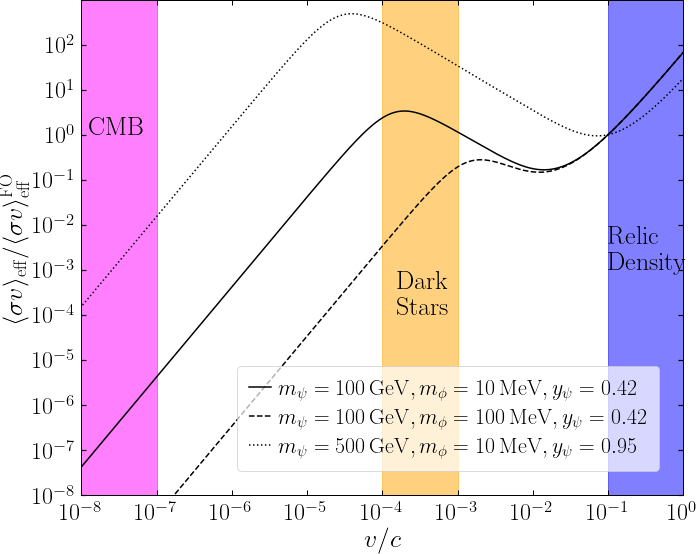

In [10]:
fig = plt.figure(figsize=(10,8))
plt.plot(vel, sigma_v1, 'k-', label = r'$m_\psi = 100\,{\rm GeV}, m_\phi = 10\,{\rm MeV}, y_\psi = 0.42$')
plt.plot(vel, sigma_v2, 'k--', label = r'$m_\psi = 100\,{\rm GeV}, m_\phi = 100\,{\rm MeV}, y_\psi = 0.42$')
plt.plot(vel3, sigma_v3, 'k:',  label = r'$m_\psi = 500\,{\rm GeV}, m_\phi = 10\,{\rm MeV}, y_\psi = 0.95$')
# plt.plot(vel, sigma_v4, 'b-', label = 'test')
plt.fill_between(x = [0.1, 1], y1 = [10**(-8), 10**(-8)], y2 = [1000, 1000], alpha = 0.5, color = 'blue')
plt.fill_between(x = [10**(-4), 10**(-3)], y1 = [10**(-8), 10**(-8)], y2 = [1000, 1000], alpha = 0.5, color = 'orange')
plt.fill_between(x = [10**(-8), 10**(-7)], y1 = [10**(-8), 10**(-8)], y2 = [1000, 1000], alpha = 0.5, color = 'magenta')
plt.text(10**(-7.9), 1, s = "CMB", color = 'black', fontsize = 26)
plt.text(10**(-3.8), 10**(-4), s = "Dark \n Stars", color = 'black', fontsize = 26)
plt.text(10**(-1), 10**(-3), s = "Relic\n Density", color = 'black', fontsize = 26)
ax = plt.axes()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$v/c$')
plt.ylabel(r'$\langle\sigma v\rangle_{\rm eff}/\langle\sigma v\rangle_{\rm eff}^{\rm FO}$')
plt.xticks(np.logspace(-9,0,num=10))
plt.yticks(np.logspace(-8,2,num=11))
plt.ylim(10**(-8),1000)
plt.xlim(10**(-8), 1)
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()
fig.savefig('Sommerfeld.pdf')

In [4]:
# CMB constraint region
m_psi = np.arange(1, 3, 0.001)
m_phi = np.arange(-3, -1, 0.001)
res = []
for i in range(len(m_phi)):
    row = []
    for j in range(len(m_psi)):
        row.append(CMB_constrain(10**m_psi[j], 10**m_phi[i]))
    
    res.append(row)
    
np.savetxt('CMB_constraint.txt',res, delimiter = '\t')